In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 1. Uploading CSV files (from dim_movie and fact_movie_rating)

**Uploading files form file to colab**

In [2]:
from google.colab import files

# Upload both files (dim_movie.csv and fact_movie_ratings.csv)
uploaded = files.upload()


Saving dim_movie.csv to dim_movie.csv
Saving fact_movie_ratings.csv to fact_movie_ratings.csv


**Loading the uploaded csv files in to pandas dataframe**


In [3]:
# Load the uploaded CSV files
movie = pd.read_csv("dim_movie.csv")
ratings = pd.read_csv("fact_movie_ratings.csv")

## 2. Load and Merge Data

**merging datasets**

In [4]:
# Merge them on tconst (movie ID)
df = pd.merge(movie, ratings, on="tconst")

**Drop misssing values**

In [5]:
# Drop missing values from relevant columns
df = df.dropna(subset=["runtimeMinutes", "averageRating", "numVotes"])

# Show a preview
df.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0743275,tvEpisode,The Tracy Sadler Story,The Tracy Sadler Story,0,1960.0,9999.0,60.0,Western,8.2,94
1,tt10003626,tvEpisode,The Treasure,The Treasure,0,2019.0,9999.0,0.0,"Action,Adventure,Animation",8.3,26
2,tt30577730,tvEpisode,Defiance,Defiance,0,2024.0,9999.0,0.0,"Biography,Drama,History",7.7,187
3,tt1692816,tvEpisode,Can You Get Up?,Can You Get Up?,0,2010.0,9999.0,0.0,Comedy,7.0,23
4,tt10212812,short,Kubota,Kubota,0,1982.0,9999.0,21.0,"Documentary,Short",6.9,9


**shape of the df**

In [6]:
df.shape

(15671, 11)

## 3. Preprocessing & Clustering

In [8]:

# Select features
features = df[["runtimeMinutes", "averageRating", "numVotes"]]

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_features)


## 4. Visualize Clusters

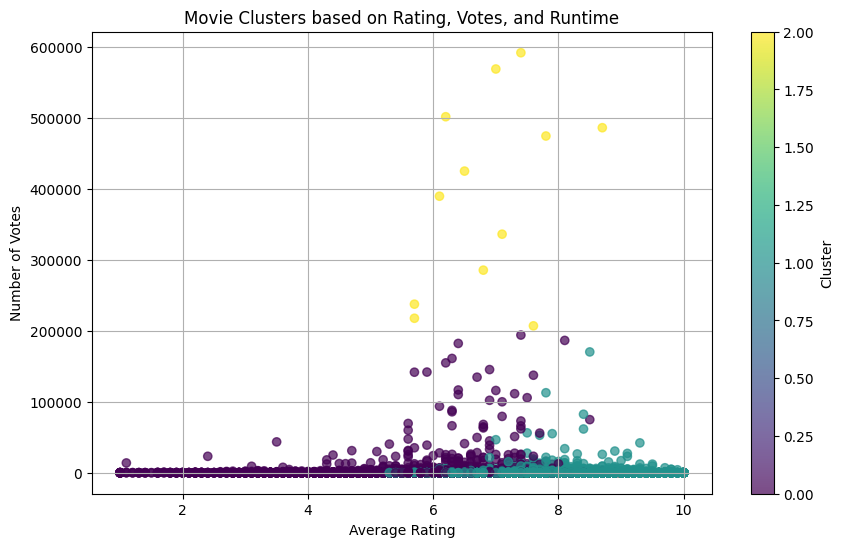

In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(df["averageRating"], df["numVotes"], c=df["cluster"], cmap="viridis", alpha=0.7)
plt.xlabel("Average Rating")
plt.ylabel("Number of Votes")
plt.title("Movie Clusters based on Rating, Votes, and Runtime")
plt.colorbar(label="Cluster")
plt.grid(True)
plt.show()


## 5. Export Clustered Results

In [12]:
df.to_csv("clustered_movies.csv", index=False)

# Download the file
files.download("clustered_movies.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Then checking the clustered what it looks like**

In [13]:
df2 = pd.read_csv("clustered_movies.csv")

In [14]:
df2.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,cluster
0,tt0743275,tvEpisode,The Tracy Sadler Story,The Tracy Sadler Story,0,1960.0,9999.0,60.0,Western,8.2,94,1
1,tt10003626,tvEpisode,The Treasure,The Treasure,0,2019.0,9999.0,0.0,"Action,Adventure,Animation",8.3,26,1
2,tt30577730,tvEpisode,Defiance,Defiance,0,2024.0,9999.0,0.0,"Biography,Drama,History",7.7,187,1
3,tt1692816,tvEpisode,Can You Get Up?,Can You Get Up?,0,2010.0,9999.0,0.0,Comedy,7.0,23,1
4,tt10212812,short,Kubota,Kubota,0,1982.0,9999.0,21.0,"Documentary,Short",6.9,9,1


In [15]:
df2['cluster'].value_counts()

,count
cluster,
1,10889
0,4770
2,12
